# Three Neuron Inhibitory Phase Plots

The purpose of this notebook is to investigate a relatively simple neural network of only three neurons: two excitatory ones interacting only indirectly by direct excitation of the third, inhibitory. We aim to study multistability as a function of the 5 relevant parameters: namey the (symmetric) biases and weights.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Defining the functions used for neuronal evolution: 

In [2]:
def rl(x):
    return np.maximum(x,0)

def evolve(I, W, b, alpha=0.01):
    steps = len(I[0, :])
    for ii in range(1,steps):
        I[:,ii] = (1-alpha)*I[:,ii-1] + alpha*(W.dot(rl(I[:,ii-1])) + b)

### Defining the functions used for plotting: 

In [3]:
def neuronplot(I, neuron=0, color='k', rl=False):
    X = I[neuron, :]
    if rl:
        X = rl(X)
    plt.plot(X)
    
def phaseplot(I, neurons=(0,1), color='k', rl=False):
    X = I[neurons[0], :]
    Y = I[neurons[1], :]
    if rl:
        X = rl(X)
        Y = rl(Y)
    plt.plot(X, Y, color=color)
    
def show_neuron_space(W, b, inits, neuron=0):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        neuronplot(I, neuron=neuron, color=colors[num])
    
def directedphaseplot(I, b, num=200, color='k', neurons=(0,1), withBias=False):
    i1 = neurons[0]; i2 = neurons[1]
    x = I[i1, :]; y = I[i2, :]
    if withBias:
        x += b[i1]; y += b[i2]

    steps = len(x)
    skip = steps/num
    x = x[::skip]; y = y[::skip]
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, color=color)
    
def directedphaseplot3D(I, B, ax, num=200, color='k', neurons=(0,1,2), withBias=False):
    i1 = neurons[0]; i2 = neurons[1]; i3 = neurons[2]
    x = I[i1, :]; y = I[i2, :]; z = I[i3, :]
    if withBias:
        x += b[i1]; y += b[i2]; z += b[i3]
    steps = len(x)
    skip = steps/num
    x = x[::skip]; y = y[::skip]; z = z[::skip]
    ax.quiver(x[:-1], y[:-1], z[:-1], (x[1:]-x[:-1]), (y[1:]-y[:-1]), (z[1:]-z[:-1]),
                    color=color)


### Parameters we'll be using for these tests:

In [4]:
W = np.zeros([3,3])
steps = 10000
alpha = .01
I = np.zeros([np.shape(W)[0],steps])

## Single self-excitatory neuron with bias

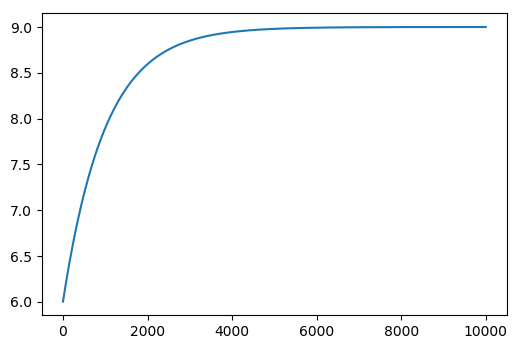

In [5]:
ee = .9; ei = 0; ie = 0
b1 = 0.9; b2 = 0; bi = 0
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie; W =  W.T
# Biases:
b = np.array([b1,b2,bi])
# Initial activity:
init = np.array([6,.0,.0]); I[:,0] = init

evolve(I, W, b, alpha=alpha)
    
neuronplot(I, color='b')
plt.show()

## An inhibitory neuron influencing two excitatory ones
### Near Criticality

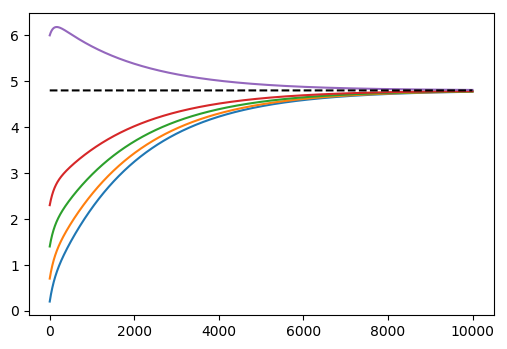

In [6]:
ee = 0.95; ei = 0; ie = -.3
b1 = .6; b2 = 0; bi = 1.2
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
W[2,:2] = ie; W =  W.T
b = np.array([b1,b2,bi])

inits = [[.2,.3,.0],[.7,.3,.0],[1.4,.0,.0],[2.3,.0,.0],[6,.0,.0]]
show_neuron_space(W, b, inits)
plt.plot([(b1+ie*bi)/(1-ee) for i in range(steps)], 'k--')
plt.show()

## Full System

In [7]:
def show_phase_space(W, b, inits, withBias=False, scheme="2D"):
    if scheme=="2D":
        show_phase_plane(W, b, inits, withBias=withBias)
    elif scheme=="3D":
        show_phase_volume(W, b, inits, withBias=withBias)
    else:
        print "scheme " + scheme + " does not exist."
    

def show_phase_plane(W, b, inits, withBias=False):
    colors = ['r','b','g','m','c','y','k']
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.axes().set_aspect('equal')
    
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        plt.axes().set_aspect('equal', 'datalim')
        directedphaseplot(I, b, color=colors[num], withBias=withBias)
    
def show_phase_volume(W, b, inits, num=200, withBias=False):
    colors = ['r','b','g','m','c','y','k']
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for i, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        directedphaseplot3D(I, b, ax, num=num, color=colors[i], withBias=withBias)

def show_inhibitory_space(W, b, inits):
    colors = ['r','b','g','m','c','y','k']
    for num, init in enumerate(inits):
        I[:, 0] = np.array(init)
        evolve(I, W, b)
        neuronplot(I, neuron=2, color=colors[num])

### Oscilliatory Solution

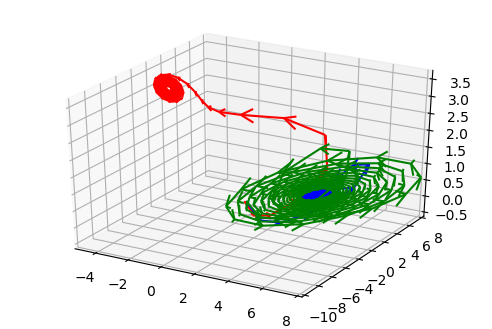

In [53]:
ee = 1.95; ei = .5; ie = -4
b1 = .3; b2 = .3; bi = -2
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

inits = [[.3,.7,.0],[.7,.3,.0],[.6,.5,.0]]

#show_phase_plane(W, b, inits)
show_phase_volume(W, b, inits)
plt.xlim([-5,8])
plt.ylim([-10,8])

#plt.plot(I[0,:])


plt.show()

In [ ]:
directedphaseplot()

In [ ]:
plt.ion()

In [ ]:

init = [.3,.7,.0]
I[:, 0] = np.array(init)
evolve(I, W, b)
plt.plot(I[2,:])
plt.figure()
init = [.7,.3,.0]
I[:, 0] = np.array(init)
evolve(I, W, b)
plt.plot(I[2,:])
plt.figure()
init = [.6,.5,.0]
I[:, 0] = np.array(init)
evolve(I, W, b)
plt.plot(I[2,:])

### Solution without oscillation

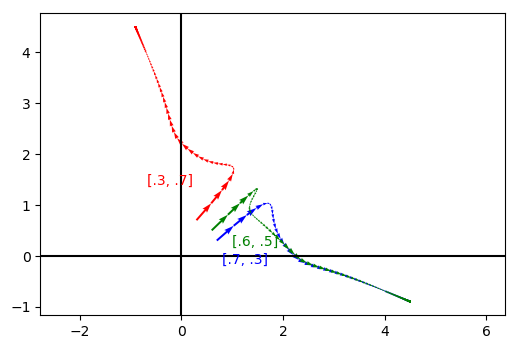

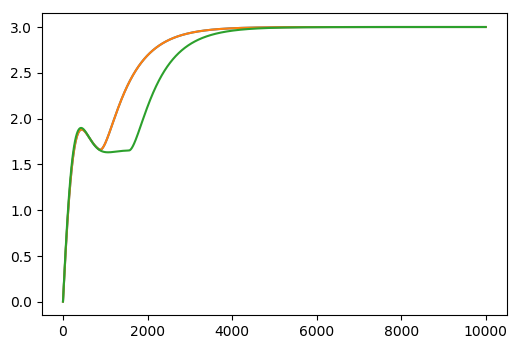

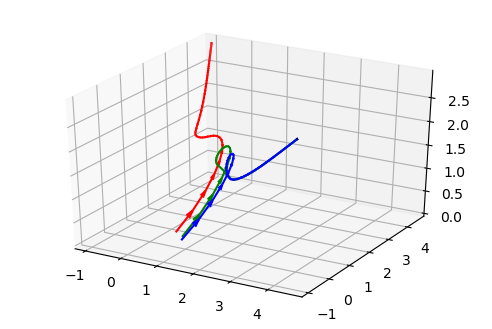

0.24

In [41]:
ee = 1.2; ei = 0.6; ie = -0.5
b1 = b2 = .6; bi = 0.3
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

inits = [[.3,.7,.0],[.7,.3,.0],[.6,.5,.0]]

show_phase_space(W, b, inits)

plt.text(-.67,1.4,"[.3, .7]",color='r')
plt.text(.8,-0.15,"[.7, .3]",color='b')
plt.text(1.0,.2,"[.6, .5]",color='g')
#neuronplot(I, b)
plt.axes().set_aspect('equal')
plt.figure()
show_inhibitory_space(W, b, inits)

show_phase_volume(W, b, inits)

plt.show()
ee**2 + 4*ei * ie

In [ ]:
show_phase_plane(W, b, inits)
show_phase_volume(W, b, inits)

plt.show()

### Solution with no bias on the inhibitory neuron

In [ ]:
init = np.array([.7,.3,.0])
I[:,0] = init
ee = 2; ei = 2; ie = -1.5
b1 = b2 = 0.7; bi = 0
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

show_phase_space(W, b, inits)

plt.text(-1., 0.5,"[.3, .7]",color='r')
plt.text(0.5,-1.,"[.7, .3]",color='b')
plt.text(0.5,.7,"[.6, .5]",color='g')
#neuronplot(I, b)

plt.figure()
show_inhibitory_space(W, b, inits)

plt.show()

In [ ]:
show_phase_volume(W, b, inits)

## Solution with no bias and no oscillation

In [ ]:
ee = 1.2; ei = 0.6; ie = -1.0
b1 = b2 = .6; bi = 0
# Excitatory neurons (symmetric weights)
W[0,0] = ee; W[0,2] = ei; W[1,1] = ee; W[1,2] = ei;
# Inhibitory neuron:
W[2,:2] = ie
W =  W.T
# Biases:
b = np.array([b1,b2,bi])

inits = [[.3,.7,.0],[.7,.3,.0],[.6,.5,.0]]

show_phase_space(W, b, inits)

plt.text(0,1.4,"[.3, .7]",color='r')
plt.text(.67,-.4,"[.7, .3]",color='b')
plt.text(0.3,.0,"[.3, .5]",color='g')
#neuronplot(I, b)

plt.figure()
show_inhibitory_space(W, b, inits)

plt.show()

In [ ]:
show_phase_volume(W, b, inits)